<a href="https://colab.research.google.com/github/sifakhru/rock-paper-scissors-classification-cnn/blob/main/rock-paper-scissors-classification-sequential-model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Classification: Rock Paper Scissors**

Program ini merupakan proyek akhir Kelas Belajar Machine Learning untuk Pemula dari Dicoding. Tujuan dari program ini untuk mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.

Oleh:


> **Muhammad Fakhrurrozi**




## Proses Persiapan

In [1]:
# Mengihitung waktu lamanya eksekusi tiap sel di Google Colab

!pip install ipython-autotime
%load_ext autotime

time: 1.87 ms (started: 2021-07-04 07:36:31 +00:00)


In [2]:
# Mengimpor liblary yang dibutuhkan

import tensorflow as tf
import zipfile, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.preprocessing import image
from google.colab import files
%matplotlib inline

time: 1.75 s (started: 2021-07-04 07:37:25 +00:00)


In [3]:
# Memastikan versi Tensorflow 2.x

print('Versi TensorFlow:', tf.__version__)

Versi TensorFlow: 2.5.0
time: 2.99 ms (started: 2021-07-04 07:37:28 +00:00)


## Data Preprocessing

In [4]:
# Mempersiapkan dataset

!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O rockpaperscissors.zip

--2021-07-04 07:37:31--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  7.81MB/s    in 50s     

2021-07-04 07:38:22 (6.16 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]

time: 50.9 s (started: 2021-07-04 07:37:31 +00:00)


In [5]:
# Melakukan ekstraksi pada file zip

local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

time: 3.73 s (started: 2021-07-04 07:38:43 +00:00)


In [6]:
# Membuat direktori base_dir, train_dir, dan val_dir

base_dir = 'rockpaperscissors/rps-cv-images'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

os.listdir(base_dir)

['rock', 'README_rpc-cv-images.txt', 'scissors', 'paper']

time: 8.64 ms (started: 2021-07-04 07:38:47 +00:00)


In [10]:
# Melakukan Augmentasi Gambar

train_aug = ImageDataGenerator(
      rescale= 1./255,
      rotation_range= 20,
      zoom_range=0.15,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip= True,
      shear_range= 0.2,
      fill_mode= 'nearest',
      validation_split= 0.4)

val_aug = ImageDataGenerator(
      rescale= 1./255,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range= 0.2,
      fill_mode= 'nearest',
      validation_split= 0.4)

time: 8.59 ms (started: 2021-07-04 07:41:00 +00:00)


In [11]:
# Membuat ImageDataGenerator

train_data = train_aug.flow_from_directory(
        base_dir,
        target_size=(100,150),
        class_mode='categorical',
        batch_size=32,
        subset='training')

val_data = val_aug.flow_from_directory(
        base_dir,
        target_size=(100,150),
        class_mode='categorical',
        batch_size=32,
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.
time: 218 ms (started: 2021-07-04 07:41:03 +00:00)


## Membangun Model

In [12]:
# Membangun model sequential

model = tf.keras.models.Sequential([
   tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2, 2),
   tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
   tf.keras.layers.MaxPooling2D(2,2),
   tf.keras.layers.Flatten(),
   tf.keras.layers.Dense(512, activation='relu'),
   tf.keras.layers.Dropout(0.5),
   tf.keras.layers.Dense(3, activation='softmax')
])

# compile model dengan 'RMSprop' optimizer loss function 'categorical_crossentropy'
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.RMSprop(learning_rate=0.001, rho=0.9, epsilon=None),
              metrics=['accuracy'])

# menampilkan model
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21760)            

In [13]:
from datetime import datetime

logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")

# Mendefinisikan TensorBoard callback.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir, histogram_freq=1, profile_batch = 100000000)
file_writer_cm = tf.summary.create_file_writer(logdir + '/cm')

time: 390 ms (started: 2021-07-04 07:41:14 +00:00)


## Melatih Model

In [14]:
# Melatih model dengan model.fit

h = model.fit(
  train_data,
  batch_size=4,
  epochs=50, 
  validation_data=val_data,
  callbacks=tensorboard_callback
  )

Epoch 1/50
42/42 [==============================] - 43s 264ms/step - loss: 1.2372 - accuracy: 0.4132 - val_loss: 0.9221 - val_accuracy: 0.6076
Epoch 2/50
42/42 [==============================] - 11s 257ms/step - loss: 0.8740 - accuracy: 0.6149 - val_loss: 0.5686 - val_accuracy: 0.8169
Epoch 3/50
42/42 [==============================] - 11s 259ms/step - loss: 0.5918 - accuracy: 0.7511 - val_loss: 0.4068 - val_accuracy: 0.8719
Epoch 4/50
42/42 [==============================] - 11s 262ms/step - loss: 0.4722 - accuracy: 0.7976 - val_loss: 0.4780 - val_accuracy: 0.8295
Epoch 5/50
42/42 [==============================] - 11s 255ms/step - loss: 0.5005 - accuracy: 0.7998 - val_loss: 0.4310 - val_accuracy: 0.8490
Epoch 6/50
42/42 [==============================] - 11s 254ms/step - loss: 0.4576 - accuracy: 0.8455 - val_loss: 0.3014 - val_accuracy: 0.9130
Epoch 7/50
42/42 [==============================] - 11s 256ms/step - loss: 0.3493 - accuracy: 0.8661 - val_loss: 0.2145 - val_accuracy: 0.9291

## Evaluasi Model

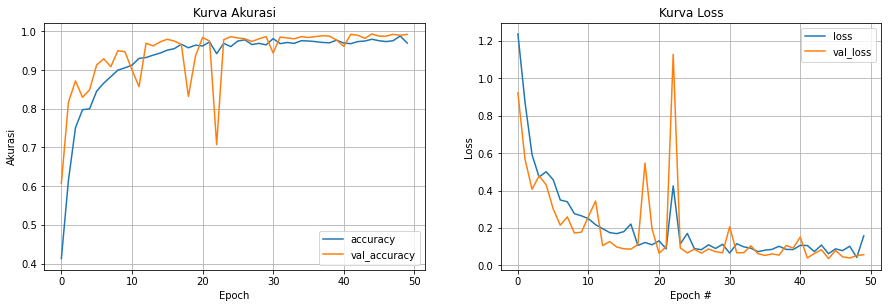

time: 360 ms (started: 2021-07-04 07:51:52 +00:00)


In [15]:
# Menampilkan kurva hasil pelatihan

fig = plt.figure(figsize=(7, 4))
fig.set_figheight(10)
fig.set_figwidth(15)

acc = h.history['accuracy']
loss = h.history['loss']

val_acc = h.history['val_accuracy']
val_loss = h.history['val_loss']

plt.subplot(2, 2, 1)
plt.plot(acc, label='accuracy')
plt.plot(val_acc, label='val_accuracy')
plt.title('Kurva Akurasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(loss, label='loss')
plt.plot(val_loss, label='val_loss')
plt.title('Kurva Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.legend()
plt.grid()

In [17]:
score = model.evaluate(train_data)
print('Train Loss:', score[0])
print('Train Accuracy:', score[1])

score = model.evaluate(val_data)
print('Val Loss:', score[0])
print('Val Accuracy:', score[1])

42/42 [==============================] - 6s 151ms/step - loss: 0.0405 - accuracy: 0.9878
Train Loss: 0.04052178934216499
Train Accuracy: 0.9878234267234802
28/28 [==============================] - 4s 142ms/step - loss: 0.0545 - accuracy: 0.9920
Val Loss: 0.05451461300253868
Val Accuracy: 0.991990864276886
time: 10.7 s (started: 2021-07-04 07:53:04 +00:00)


## Prediksi Model

Saving IMG_20210702_134153-01.jpeg to IMG_20210702_134153-01.jpeg
IMG_20210702_134153-01.jpeg
The result of image prediction is
paper


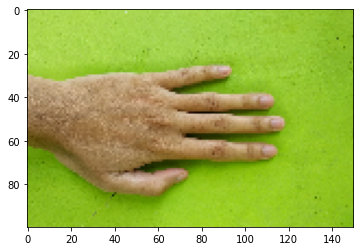

time: 24.7 s (started: 2021-07-04 07:57:01 +00:00)


In [20]:
# Melakukan prediksi Gambar menggunakan model

uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  prob = model.predict(images)
  classes = prob.argmax(axis=-1) 
  
  print(fn)
  print('The result of image prediction is')
  if classes==0:
    print('paper')
  elif classes==1:
    print('rock')
  elif classes==2 :
    print('scissors')